<a href="https://colab.research.google.com/github/jessikamorais/FIAP/blob/main/projeto_modulo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Síndrome da Fadiga Crônica (EM/SFC) e Depressão**

A **síndrome de fadiga crônica**, também conhecida como  **Encefalomielite Miálgica,** é caracterizada por deixar o portador com uma sensação de estar extremamente cansado o tempo todo, mesmo após uma boa noite de sono. Esta condição pode piorar após qualquer tipo de atividade, exercício físico ou mental. A pessoa fica exausta para fazer quase todas as suas atividades diárias, como: tomar banho, ir ao trabalho, fazer serviços domésticos e demais atividades que necessitem siar de casa.

Além da fadiga, a doença pode gerar sintomas como: dificuldade para dormir ou acordar, tontura, fraqueza muscular, dor de garganta, problemas digestivos, calafrios, suores noturnos, alergias ou reações alimentares, sensibilidade à luz ou à ruídos, batimentos cardíacos irregulares e falta de ar.

A **depressão** é uma doença de humor, que pode causar tristeza profunda ou apatia constante, em que o indivíduo não sente mais prazer ou sentido na vida, com sentimos de culpa, vazio e inutilidade. Em casos mais graves, o portador da doença pode pensar ou realmente atentar contra a própria vida.

Na depressão, sintomas como fadiga também podem estar presentes, assim como, problemas de sono (dormir muito ou pouco), falta de energia para realizar tarefas simples,  ansiedade, lapsos de memórias ou concentração, fala ou movimentos lentos, dor sem causa física, problemas digestivos ou cólicas abdominais e inquietação.

As duas doenças são crônicas e podem durar anos, com períodos de melhora e outros de piora do quadro. Ambas as condições tem sintomas parecidos, tais como: fadiga, problemas de sono, falta de energia, dor, problemas digestivos, dores de cabeça, lapsos de memória ou dificuldade de concentração. A depender dos sintomas, pode haver dificuldade do diagnóstico correto para o paciente, que pode apresentar uma das comorbidades ou ambas.


### Fonte de Dados:

O conjunto de dados utilizado é sintetíco, desenvolvimendo para tarefas de classificação das doenças: Encefalomielite Miálgica/Síndrome da Fadiga Crônica (EM/SFC) e/ou Depressão.

Este é o primeiro conjunto de dados desse tipo criado especificamente para ajudar iniciantes na área e pesquisadores a explorar casos complexos de diagnóstico em condições mentais e crônicas de saúde.



# **Explicação das variáveis presentes nos dados:**

* **age** -	Idade do paciente:
    * Variando de 18 à 70 anos.
* **gender** -	Gênero:
    * Feminio,
    * Masculino.
* **fatigue_severity_scale_score** -	Escala de Gravidade da Fadiga. Esta escala originalmente varia de 1 até 72, funcionando como  um modo de avaliar o impacto da fadiga no paciente. O teste é baseado em um questionário com 9 perguntas, que devem ser respondidas com os números 1 à 7 , que representam respectivamnete, completamente em desacordo com a sentença e completamente em acordo. Uma pontuação inferior a 36 sugere que o paciente pode não estar sofrendo de fadiga e um valor superior sugere uma avaliação médica mais aprofundada. No caso da escala apresentada neste banco de dados, eles estão normalizados.
    * Escala de 1 à 10.
* **depression_phq9_score** -	PHQ-9 Índice de depressão, questionário que avalia a gravidade de depressão do paciente em que as questões somam um valor de 1 à 27, e classificam a depressão como a seguir:
    * 1-4 - Depressão mínima
    * 5-9 - Depressão Leve
    * 10-14 - Depressão Moderada
    * 15-19 - Depressão Moderadamente Grave
    * 19-27 - Depressão grave
* **pem_present	Whether** - Mal-estar pós-esforço está presente?
    * Sim,
    * Não.
* **pem_duration_hours** -	Duração do mal-estar pós-esforço (PEM) em horas;
* **sleep_quality_index** -	Qualidade do sono;
    * Escala de 1 à 10.
* **brain_fog_level** -	Confusão mental / Dificuldade de concentração;
    * Escala de 1 à 10.
* **physical_pain_score** -	Intesidade da dor física;
    * Escala de 1 à 10.
* **stress_level** - Nível de estresse
    * Escala de 1 à 10.
* **work_status** -	Status de trabalho:
    * Trabalhando,
    * Trabalho parcial,
    * Sem trabalho.
* **social_activity_level** - Nível de atividade social:
    * Muito alto,
    * Alto,
    * Médio,
    * Baixo,
    * Muito baixo.
* **exercise_frequency** - Frequência de atividade física:
    * Diariamente,
    * Frequentemente,
    * Às vezes,
    * Raramente,
    * Nunca.
* **meditation_or_mindfulness** - O paciente pratica mindfulness ou meditação?  
    * Sim,
    * Não.
* **hours_of_sleep_per_night** - Duração média do sono por noite
* **diagnosis** - Diagnóstico (qual(is) doença(s) o paciente tem)? **(Variável Target)**
    * ME/CFS,
    * Depressão,
    * Ambas.

A base de dados pode ser acessada no seguinte link: [Dados do projeto](https://www.kaggle.com/datasets/storytellerman/mecfs-vs-depression-classification-dataset)

# **`Importando as bibliotecas`**

In [40]:
import pandas as pd # Para trabalhar com dados tabulares
from sklearn.model_selection import train_test_split #separação dos dados
from sklearn.neighbors import KNeighborsClassifier #modelo de machine learning classificação
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score #avaliação do modelo
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score #métrica de avaliação
from sklearn.preprocessing import StandardScaler, MinMaxScaler #Feature Engineer
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
import numpy as np #transformação dos dados
from sklearn.preprocessing import OrdinalEncoder #TESTE PARA ORDENAÇÃO DE DADOS CATEGÓRICOS
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# **Importando os dados**

In [41]:
data = pd.read_csv('me_depression_data.csv', sep=',')

# **Analisando os dados**

A base de dados utilizada possui uma dimensão de 16 colunas e 1000 linhas de dados. Com dados numéricos e categóricos.

In [42]:
data.shape

(1000, 16)

In [43]:
data.head(5)

,age,gender,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,Male,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,Working,Low,Daily,Yes,Depression
1,69,Male,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,Working,Low,Often,Yes,Both
2,46,Female,4.0,5.4,4.8,NaN,24.0,1.6,13.0,6.9,0,Partially working,NaN,Rarely,Yes,Depression
3,32,Female,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,Not working,High,Never,Yes,Depression
4,60,Female,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,Not working,Low,Rarely,No,Both


In [44]:
data.describe()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present
count,1000.000000,953.000000,952.000000,966.000000,952.000000,978.000000,979.000000,976.000000,979.000000,1000.000000
mean,44.385000,5.468625,5.611765,5.521843,5.459139,12.268916,6.407252,23.105533,6.571297,0.599000
std,15.321669,2.571423,2.649316,2.565460,2.566536,6.306588,2.206937,13.823953,2.040320,0.490346
min,18.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,31.750000,3.100000,3.300000,3.325000,3.300000,9.000000,6.300000,11.000000,4.800000,0.000000
50%,45.000000,5.600000,5.800000,5.600000,5.400000,10.000000,7.000000,23.000000,6.600000,1.000000
75%,57.000000,7.700000,7.900000,7.800000,7.700000,16.000000,7.500000,35.000000,8.350000,1.000000
max,70.000000,10.000000,10.000000,10.000000,10.000000,27.000000,10.000000,47.000000,10.000000,1.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           1000 non-null   int64  
 1   gender                        1000 non-null   object 
 2   sleep_quality_index           953 non-null    float64
 3   brain_fog_level               952 non-null    float64
 4   physical_pain_score           966 non-null    float64
 5   stress_level                  952 non-null    float64
 6   depression_phq9_score         978 non-null    float64
 7   fatigue_severity_scale_score  979 non-null    float64
 8   pem_duration_hours            976 non-null    float64
 9   hours_of_sleep_per_night      979 non-null    float64
 10  pem_present                   1000 non-null   int64  
 11  work_status                   953 non-null    object 
 12  social_activity_level         960 non-null    object 
 13  exer

Podemos observar que as únicas variáveis que não possuem valores nulos são: "age", "gender", "pem_present" e "diagnosis", possuindo 1000 linhas de informações preenchidas (não nulas).
As demais variáveis posssuem valores nulos, que devem ser tratados no decorrer do projeto.

# **Analisando as variáveis:**

## **Variáveis Categóricas:**

As variáveis: "gender", "work_status", "social_activity_level", "exercise_frequency", "meditation_e_mindfulness", "diagnosis", são variáveis do tipo texto que serão analisadas a seguir:

*  Variável: Gênero (**gender**) possui dois valores, Feminino (Female) e Masculino (Male), sem nenhum valor NaN (Not a number). Com uma maior quantidade de pacientes do gênero feminino (4,8% maior).


In [46]:
set(data["gender"])

{'Female', 'Male'}

In [47]:
data["gender"].value_counts()

,count
gender,
Male,524
Female,476


In [48]:
data["gender"].isna().sum()

np.int64(0)

*   Variável: Status de trabalho (**work_status**), possui três valores, Trabalhando (Working), Trabalho parcial (Partiallly working) e Sem trabalho (Not working) com uma distribuição de valores relativamente próxima, de desvio padrão 18,61. E contabilizando 47 valores NaN ao todo.

In [49]:
set(data["work_status"])

{'Not working', 'Partially working', 'Working', nan}

In [50]:
data["work_status"].value_counts()

,count
work_status,
Partially working,335
Working,320
Not working,298


In [51]:
work_count = data["work_status"].value_counts().values
std_work = np.std(work_count, ddof=1)
print(f"Desvio padrão: {std_work:.2f}")

Desvio padrão: 18.61


In [52]:
data["work_status"].isna().sum()

np.int64(47)

*  Variável: Nível de Atividade Social (**social_activity_level**), com cinco valores, Muito alto (Very high), Alto (Hight), Médio (Medium), Baixo (Low) e Muito baixo (Very low). Sendo os valores distribuidos de forma muito próxima (desvio padrão de 9,30) e contabililzando 40 valores NaN ao todo.

In [53]:
set(data["social_activity_level"])

{'High', 'Low', 'Medium', 'Very high', 'Very low', nan}

In [54]:
data["social_activity_level"].value_counts()

,count
social_activity_level,
Very low,203
High,200
Low,190
Very high,186
Medium,181


In [55]:
activity_count = data["social_activity_level"].value_counts().values
std_activity = np.std(activity_count, ddof=1)
print(std_activity)

9.300537618869138


In [56]:
data["social_activity_level"].isna().sum()

np.int64(40)

*   Variável: Frequência de atividade física (**exercise_frequency**), com
cinco valores, Diariamente (Daily), Frequentemente (Often), Às vezes (Sometime), Raramente (Rarely) e Nunca (Never). Como podemos ver no desvio padrão da contagem dos dados (15,27), estes apresentam uma proporção razoável entre si. E com 39 valores NaN.

In [57]:
set(data["exercise_frequency"])

{'Daily', 'Never', 'Often', 'Rarely', 'Sometimes', nan}

In [58]:
data["exercise_frequency"].value_counts()

,count
exercise_frequency,
Rarely,210
Often,202
Daily,194
Sometimes,184
Never,171


In [59]:
exercise_count = data["exercise_frequency"].value_counts().values
std_activity = np.std(exercise_count, ddof=1)
print(f"Desvio padrão: {std_activity:.2f}")

Desvio padrão: 15.27


In [60]:
data["exercise_frequency"].isna().sum()

np.int64(39)

*    Variável: Meditação ou mindfulness (**meditation_or_mindfulness**), possui dois valores sim e não, constatando se o paciente em questão realiza ou não uma das atividades em seu dia a dia. Possui 11 valores do tipo NaN.

In [61]:
set(data["meditation_or_mindfulness"])

{'No', 'Yes', nan}

In [62]:
data["meditation_or_mindfulness"].value_counts()

,count
meditation_or_mindfulness,
Yes,505
No,484


In [63]:
data["meditation_or_mindfulness"].isna().sum()

np.int64(11)

In [64]:
data["meditation_or_mindfulness"].isna().sum()

np.int64(11)

*   Variável: Diagnóstico (**diagnosis**), a variável *target* da base de dados, possuindo três valores, Depressão (Depression), ME/CFS e Ambos (Both). Os valores dizem respeito a se o paciente possui uma das doenças ou ambas. A distribuição dos valores é mais heterogênea para o diagnóstico de pacientes que possuem ambas as doenças (Desvio padrão 113,76), o que pode gerar um desbalanceamento na tratativa do modelo.

In [65]:
set(data["diagnosis"])

{'Both', 'Depression', 'ME/CFS'}

In [66]:
data["diagnosis"].value_counts()

,count
diagnosis,
Depression,401
ME/CFS,397
Both,202


In [67]:
diagnosis_count = data["diagnosis"].value_counts().values
std_diagnosis = np.std(diagnosis_count, ddof=1)
print(f"Desvio padrão: {std_diagnosis:.2f}")

Desvio padrão: 113.76


In [68]:
data["diagnosis"].isna().sum()

np.int64(0)

# **Variáveis numéricas:**

Vamos analisar todas as variáveis numéricas à procura de **outliers** utilizando os gráficos de boxplot:

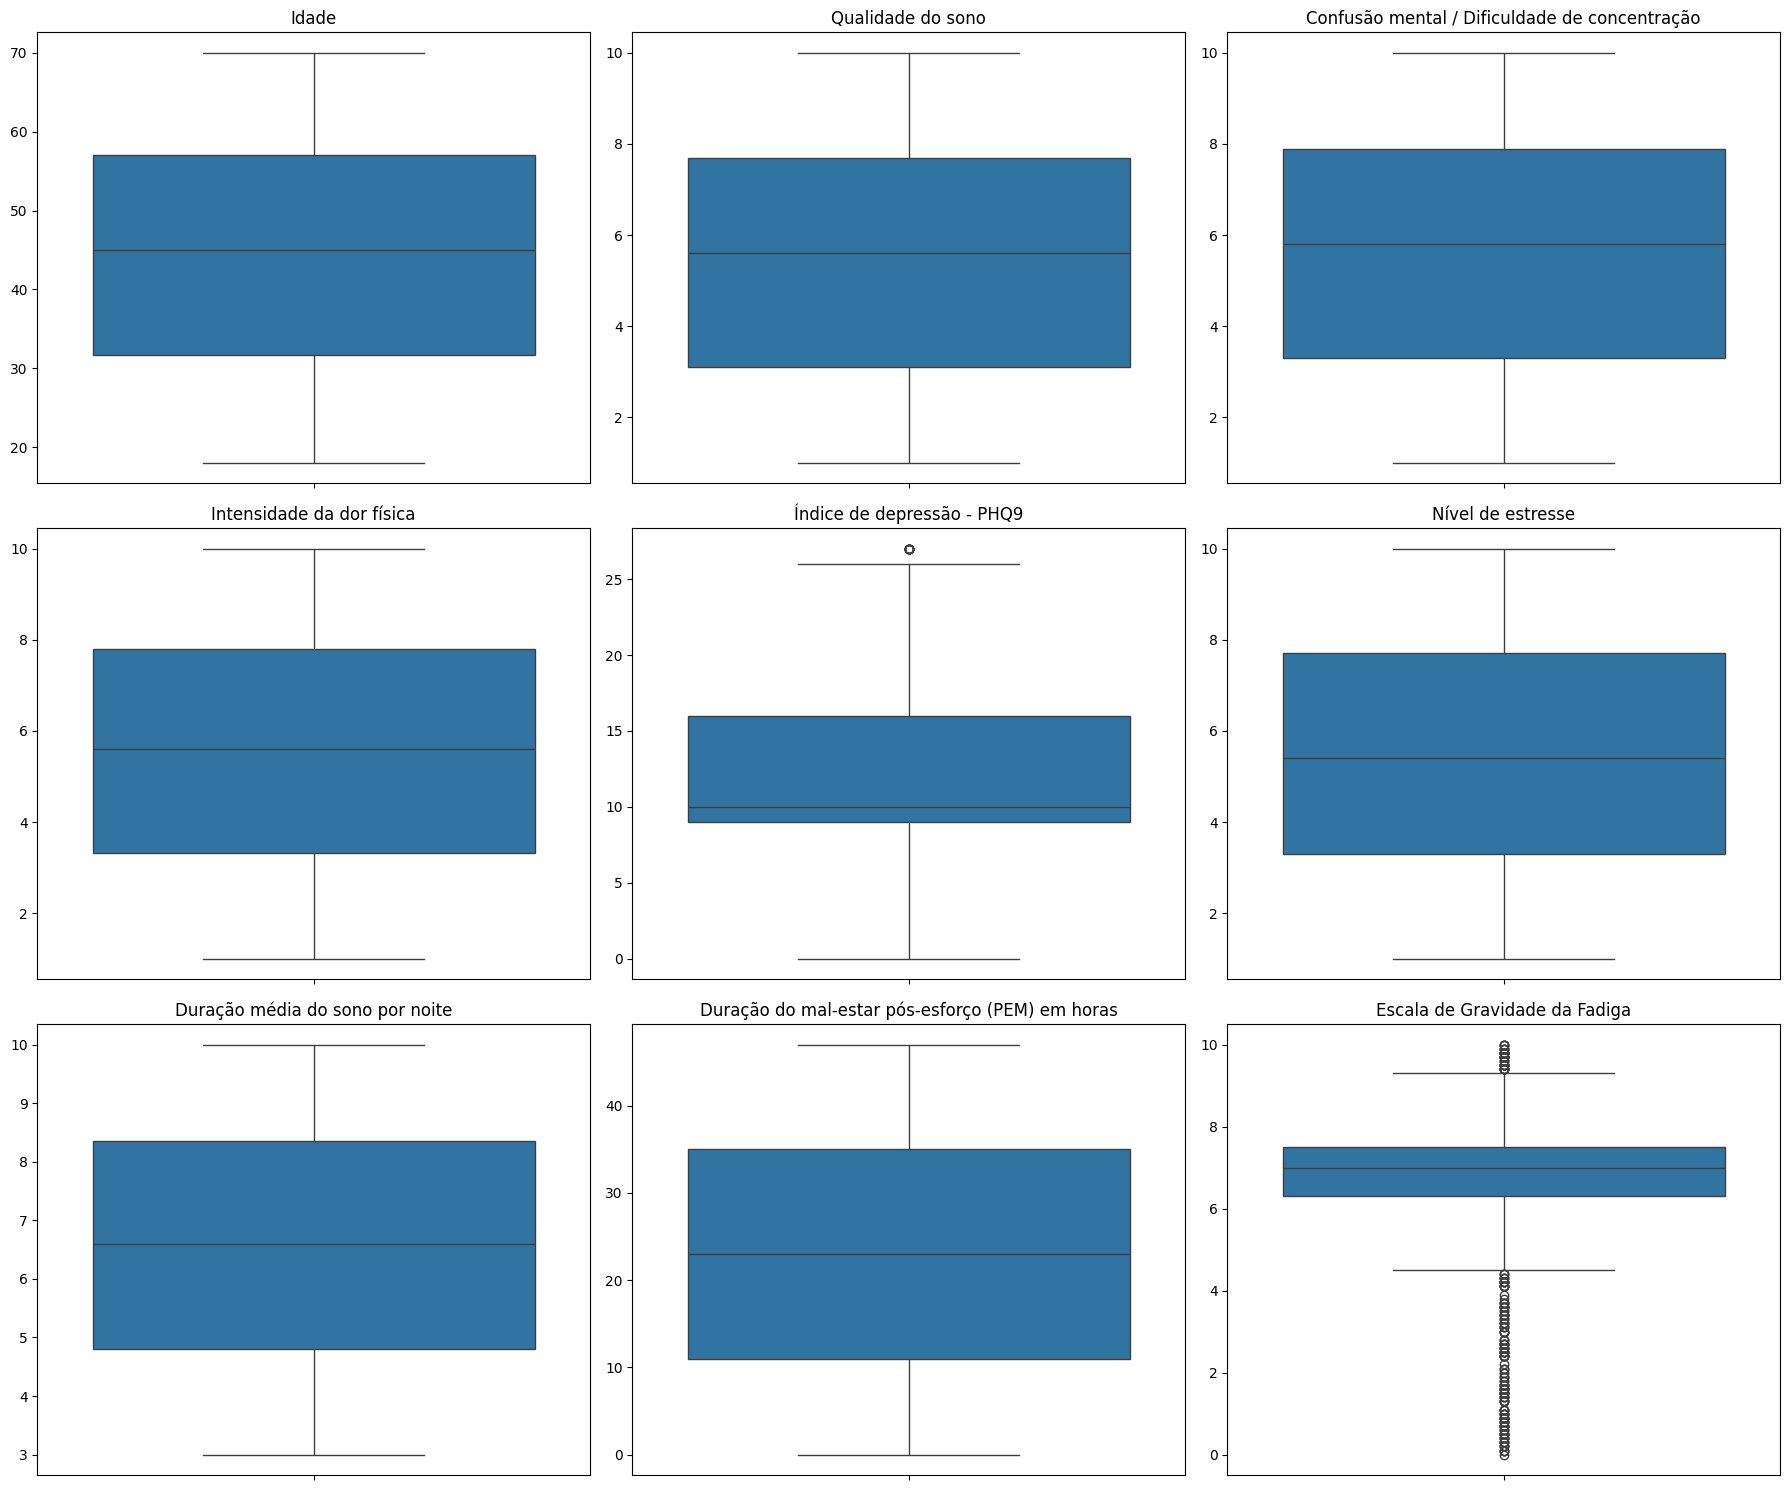

In [69]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15)) # Create a 3x3 grid of subplots

# Flatten the axes array for easy iteration
axes = axes.flatten()

# List of columns to plot
columns_to_plot = [
    "age",
    "sleep_quality_index",
    "brain_fog_level",
    "physical_pain_score",
    "depression_phq9_score",
    "stress_level",
    "hours_of_sleep_per_night",
    "pem_duration_hours",
    "fatigue_severity_scale_score"
]

# Titles for the plots
plot_titles = [
    "Idade",
    "Qualidade do sono",
    "Confusão mental / Dificuldade de concentração",
    "Intensidade da dor física",
    "Índice de depressão - PHQ9",
    "Nível de estresse",
    "Duração média do sono por noite",
    "Duração do mal-estar pós-esforço (PEM) em horas",
    "Escala de Gravidade da Fadiga"
]

# Iterate through columns and axes to create box plots
for i, col in enumerate(columns_to_plot):
    sns.boxplot(y=data[col], ax=axes[i])
    axes[i].set_title(plot_titles[i])
    axes[i].set_ylabel("") # Remove y-axis label to avoid clutter

plt.tight_layout()
plt.show()

Analisando os gráficos, vemos que o "Índice de depressão (PHQ9)" apresenta um outlier, acima do valor de 25 e abaixo do valor de 19. Já o gráfico para a variável "Escala de gravidade da fadiga", há vários outliers, que estão acima ou abaixo da mediana.
Em ambos os casos, embora estatisticamente os dados sejam considerados como outliers, pois, estão longe da concentração central (mediana), não devemos desconsiderá-los para a predissão do modelo.
Os dados estão dentro do valor previsto para cada caso. No caso do Índice de depressão, este pode variar de 0 à 29, e podemos ver pelo gráfico que o outlier está dentro deste valor. O mesmo acontece para a Escala de gravidade da fadiga, todos os valores apresentados como outliers, estão dentro da escala esperada, entre 0 e 10. O que acontece neste caso é que, pode haver uma alta concentração de dados em torno da mediana e os dados podem estar assimetricamente distribuidos. Isto pode ser visto no gráfico a seguir, para o caso da Escala de gravidade da fagida:

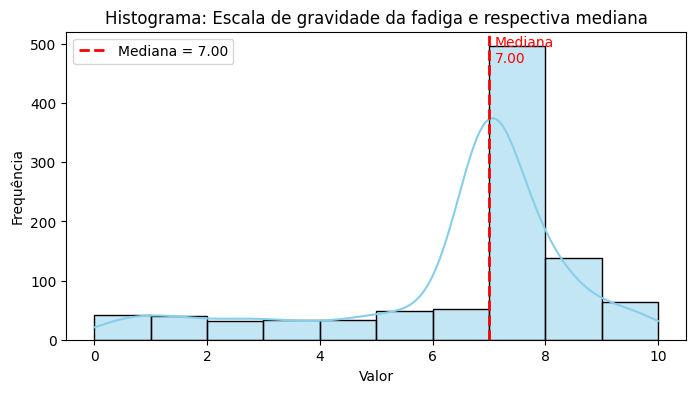

In [70]:
coluna = data["fatigue_severity_scale_score"].dropna()  # remove NaNs, se houver

mediana = np.median(coluna)

plt.figure(figsize=(8, 4))
sns.histplot(coluna, bins=10, kde=True, color="skyblue")

# Linha vertical indicando a mediana
plt.axvline(mediana, color='red', linestyle='--', linewidth=2, label=f'Mediana = {mediana:.2f}')

plt.text(mediana + 0.1, plt.ylim()[1]*0.9, f'Mediana\n{mediana:.2f}', color='red')

plt.title("Histograma: Escala de gravidade da fadiga e respectiva mediana")
plt.xlabel("Valor")
plt.ylabel("Frequência")
plt.legend()
plt.show()


Nos histogramas a seguir, podemos ver que as demais variáveis possuem valores mais simetricamente distribuídos (excetuando o índice de depressão PHQ9 que se assemelha mais a uma curva normal).

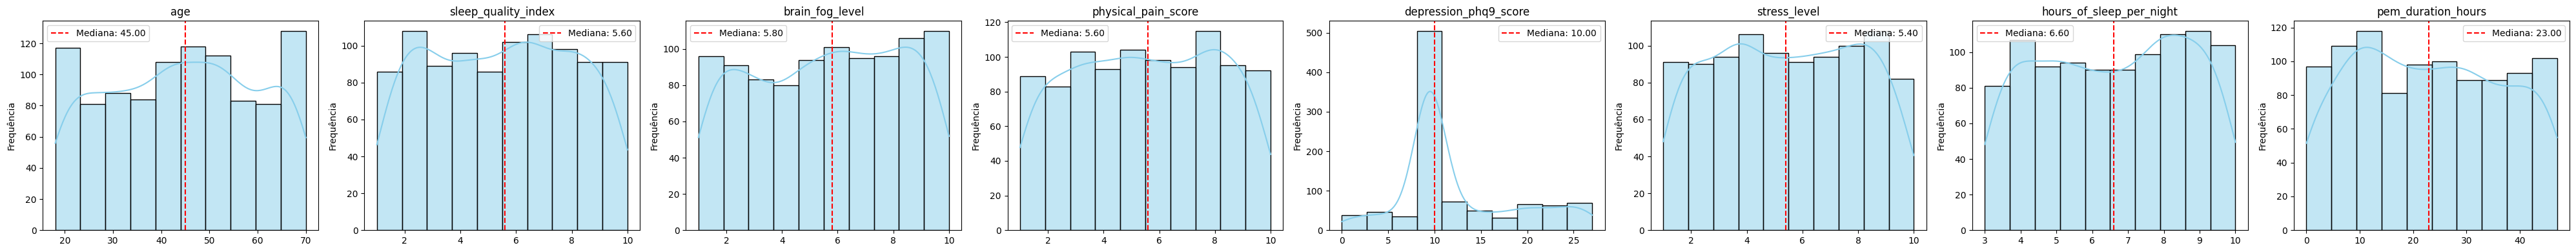

In [71]:
colunas = ["age",
    "sleep_quality_index",
    "brain_fog_level",
    "physical_pain_score",
    "depression_phq9_score",
    "stress_level",
    "hours_of_sleep_per_night",
    "pem_duration_hours",]
n = len(colunas)

plt.figure(figsize=(5 * n, 4))

for i, coluna in enumerate(colunas, 1):
    mediana = data[coluna].median()

    ax = plt.subplot(1, n, i)
    sns.histplot(data[coluna].dropna(), kde=True, bins=10, ax=ax, color="skyblue")
    ax.axvline(mediana, color='red', linestyle='--', label=f'Mediana: {mediana:.2f}')
    ax.set_title(f'{coluna}')
    ax.set_xlabel('')
    ax.set_ylabel('Frequência')
    ax.legend()

plt.tight_layout()
plt.show()

# **Compreendendo melhor o diagnóstico segundo a base de dados:**

Observando os dados, podemos nos questionar sobre como os valores das variáveis podem influênciar no diagnóstico de cada paciente. Podemos nos perguntar sobre qual genêro é mais afetado pelas doenças, qual a realação entre estar trabalhando ou não, e como a doença se manifesta na disposição do paciente após esforços físicos.

# **Diagnóstico por gênero**

No gráfico 1, podemos observar que no diagnóstico em que o paciente possui as duas doenças, não há diferença entre a quantidade de afetados em relação ao gênero. Para os demais diagnósticos, é possível ver que o gênero masculino é mais afetado.

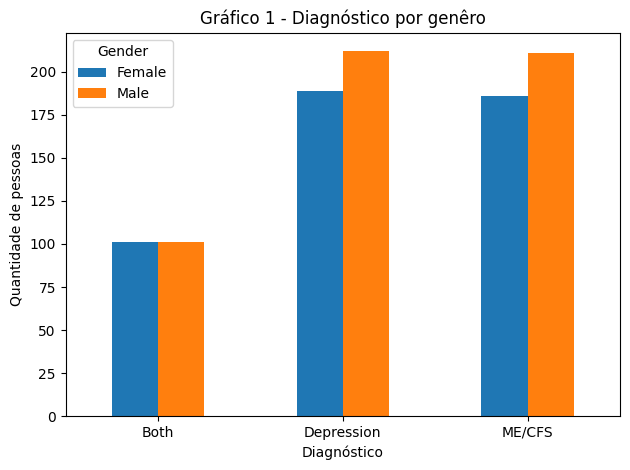

In [72]:
grouped = data.groupby(["diagnosis", "gender"]).size().unstack(fill_value=0)

grouped.plot(kind="bar")

plt.title("Gráfico 1 - Diagnóstico por genêro")
plt.xlabel("Diagnóstico")
plt.ylabel("Quantidade de pessoas")
plt.xticks(rotation=0)
plt.legend(title="Gender")
plt.tight_layout()
plt.show()

# **Relação entre trabalho e diagnóstico**

Observando o Gráfico 2, podemos ver que há mais pacientes trabalhando de forma integral ou parcial do que desempregados (o que pode ser melhor observado na soma por diagnóstico ao lado direito do gráfico). Isto significa que, para este grupo de pessoas estudadas, a depressão e/ou fadiga crônica, na maioria dos casos, não se tornaram um empecilho para a continuidade do trabalho do indivíduo.

Na análise deste caso em específico, vamos verificar a gravidade de fatores que mais afetam as duas doenças estudadas, como o Índice PHQ-9 (para a depressão) e a escala de gravidade de fadiga, que serão representados nos gráficos 3 e 4, respectivamente.

O Gráfico 3 apresenta o resultado do teste PHQ-9 em relação a quantidade de pessoas. A maior concentração está nos valores de 9 e 10 do PHQ-9, ou seja, com depressão leve ou moderada (segundo a escala do teste). Destacando no gráfico valores acima de 15, para pessoas com depressão moderadamente grave ou grave, vemos que há um total de aproximadamente 250 pessoas nesta condição. Este valor se aproxima daquele de pessoas que não estão trabalhando.

Analisando o Gráfico 4, vemos um pico na curva do gráfico no valor de 7 para o valor normalizado da escala de fadiga, este valor representa aproximadamente 45 sem a normalização, que sugere que o paciente deve passar por uma melhor avaliação médica, pois sua condição de fadiga pode ser uma doença crônica. Este valor de 7 para a escala, nos sugere que o paciente respondeu a maior parte das perguntas do teste (aproximadamente 70%) com valores altos, estando mais favoráveis a condições de fadiga. Desta forma, demos maior importância a este valor e verificamos que a soma de pessoas nesta situação é de aproximadamente 290 pacientes (aproximadamente 30% da população geral do estudo).

Assim, podemos ter uma melhor compreensão da causa de os pacientes estudados possuírem cerca de 70% de pessoas mais ativas no meio executivo, pois, não estão em níveis mais elevados de depressão (moderadamente grave e grave) e de fadiga.

Como observação, podemos deixar claro que os dados da escala de gravidade de fadiga podem ter sido normalizados, pois, a curva do seu histograma representada anteriormente se aproxima de uma curva normal.

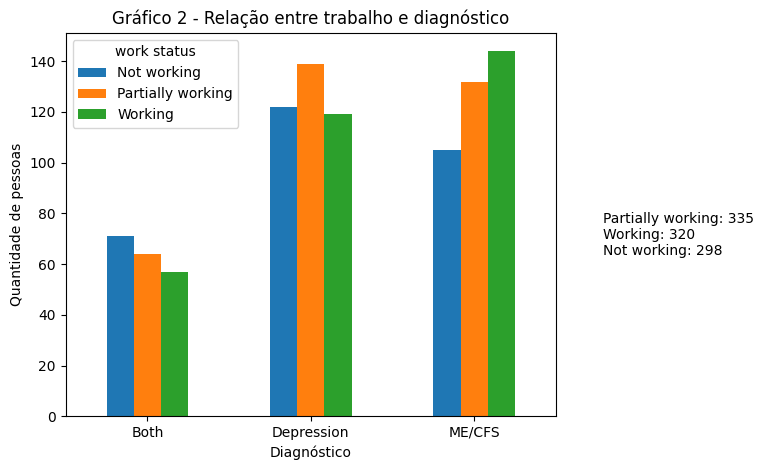

In [73]:
work_diagnosis = data.groupby(["diagnosis", "work_status"]).size().unstack(fill_value=0)
work_diagnosis.plot(kind="bar")

total_work_status = data["work_status"].value_counts()

plt.title("Gráfico 2 - Relação entre trabalho e diagnóstico")
plt.xlabel("Diagnóstico")
plt.ylabel("Quantidade de pessoas")
plt.xticks(rotation=0)
plt.legend(title="work status")
plt.tight_layout()

texto_totais = "\n".join([f"{categoria}: {quantidade}" for categoria, quantidade in total_work_status.items()])
plt.gcf().text(0.95, 0.5, texto_totais, fontsize=10, va='center')

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


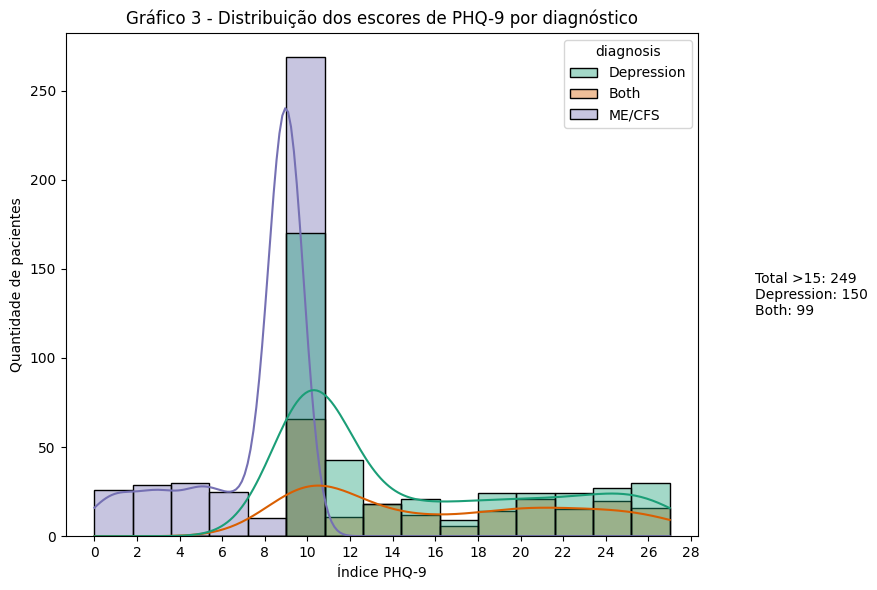

In [74]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=data,
    x="depression_phq9_score",
    hue="diagnosis",
    kde=True,
    palette="Dark2",
    alpha=0.4,
    bins=15
)

plt.title("Gráfico 3 - Distribuição dos escores de PHQ-9 por diagnóstico")
plt.xlabel("Índice PHQ-9")
plt.ylabel("Quantidade de pacientes")

plt.xticks(np.arange(0, 30, 2))

# --- cálculo dos pacientes com PHQ-9 > 15 ---
total_acima15 = (data["depression_phq9_score"] > 15).sum()

por_diagnostico = data.loc[data["depression_phq9_score"] > 15, "diagnosis"].value_counts()

texto_totais = f"Total >15: {total_acima15}\n"
texto_totais += "\n".join([f"{diag}: {qtd}" for diag, qtd in por_diagnostico.items()])

plt.gcf().text(0.95, 0.5, texto_totais, fontsize=10, va='center')

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


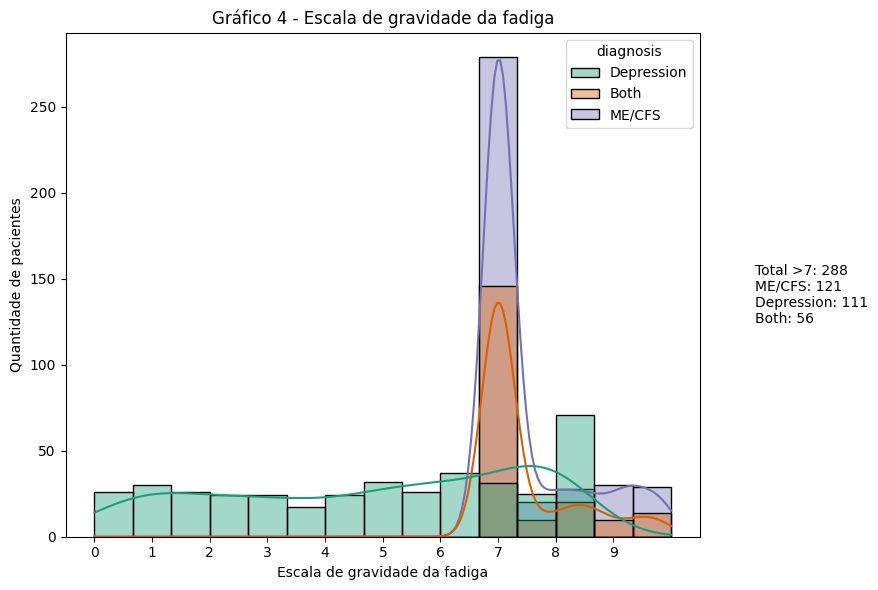

In [75]:
plt.figure(figsize=(8,6))
sns.histplot(
    data=data,
    x="fatigue_severity_scale_score",
    hue="diagnosis",
    kde=True,
    palette="Dark2",
    alpha=0.4,
    bins=15
)

plt.title("Gráfico 4 - Escala de gravidade da fadiga")
plt.xlabel("Escala de gravidade da fadiga")
plt.ylabel("Quantidade de pacientes")

plt.xticks(np.arange(0, 10, 1))

# --- cálculo dos pacientes com fatigue_severity_scale_score  > 9
total_acima7 = (data["fatigue_severity_scale_score"] > 7).sum()

por_diagnostico = data.loc[data["fatigue_severity_scale_score"] > 7, "diagnosis"].value_counts()

texto_totais = f"Total >7: {total_acima7}\n"
texto_totais += "\n".join([f"{diag}: {qtd}" for diag, qtd in por_diagnostico.items()])

plt.gcf().text(0.95, 0.5, texto_totais, fontsize=10, va='center')

plt.tight_layout(rect=[0, 0, 0.9, 1])

plt.show()


O Gráfico 5 a seguir, faz bastante sentindo com a literatura, normalmente pessoas com depressão costumam se sentir melhores após esforço físico/mental, como uma caminha ou a leitura de um  livro. Claro, que o esforço requerido para estas tarefas pode ser muito grande, mas traz um retorno para o paciente. Como vemos no Gráfico 5, todas as pessoas portadoras de Depressão se sentiram melhor após esforço (não sentiram mal-estar). Já as pessoas com fadiga e fadiga com depressão, sentiram-se mal-estar após esforço, pois, no caso de pessoas com fadiga crônica, os sintomas sempre pioram após algum tipo de esforço físico ou mental.

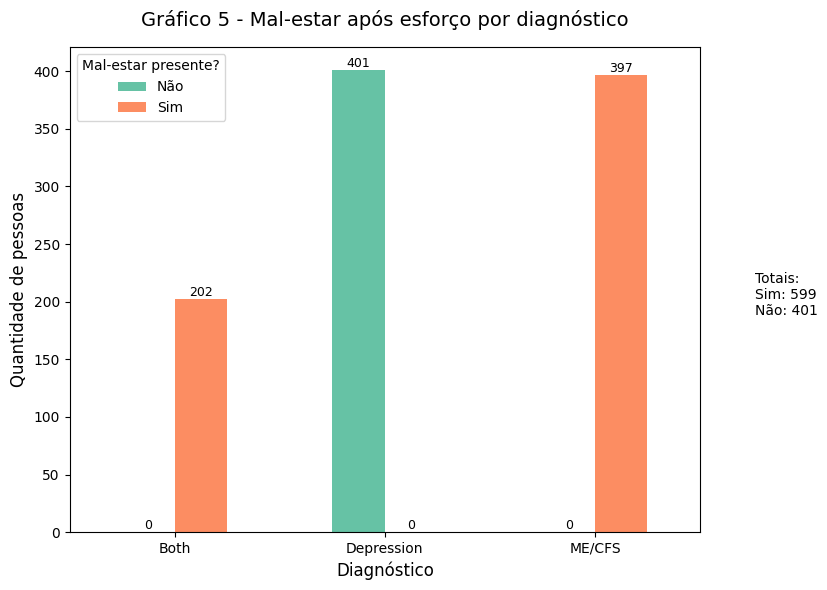

In [76]:
work_diagnosis = data.groupby(["diagnosis", "pem_present"]).size().unstack(fill_value=0)

work_diagnosis = work_diagnosis.rename(columns={0: "Não", 1: "Sim"})

colors = sns.color_palette("Set2", n_colors=2)

ax = work_diagnosis.plot(
    kind="bar",
    stacked=False,
    figsize=(8,6),
    color=colors
)

plt.title("Gráfico 5 - Mal-estar após esforço por diagnóstico", fontsize=14, pad=15)
plt.xlabel("Diagnóstico", fontsize=12)
plt.ylabel("Quantidade de pessoas", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Mal-estar presente?")

for container in ax.containers:
    ax.bar_label(container, fmt="%d", label_type="edge", fontsize=9)

total_work_status = data["pem_present"].value_counts().rename({0: "Não", 1: "Sim"})
texto_totais = "\n".join([f"{categoria}: {quantidade}" for categoria, quantidade in total_work_status.items()])
plt.gcf().text(0.95, 0.5, "Totais:\n" + texto_totais, fontsize=10, va='center')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()


# **Tratando inconsistências na base**

## Dados categóricos:
Primeiramente vamos verificar nos dados categóricos se há valores NaN (Not a Number). Como podemos ver no código abaixom temos algumas valores NaN na maioria das variáveis.
Agora, devemos nos perguntar se será melhor deletarmos estes dados de nossa base ou mantê-los, substituíndo o valor NaN por Unknwon.

In [77]:
categorical_data = data.select_dtypes(include=['object'])
categorical_data.isna().sum()

,0
gender,0
work_status,47
social_activity_level,40
exercise_frequency,39
meditation_or_mindfulness,11
diagnosis,0


Verificando o "index" de cada valor categórico que possuem valores NaN, no códigos a seguir e se estes fazem parte do mesmo paciente, podemos perceber que temos muito índices com valores NaN, e uma quantidade muito baixa de índices NaN que estão presentes no mesmo paciente. Com base nisto, consideramos que a exclusão dos pacientes com valores "NaN", não será eficiente, pois, deletará valores que podem ser valiosos para a modelagem do sistema.
Se os os valores com NaN estivesse aglomerados em apenas alguns pacientes, poderíamos excluí-los sem maiores prejuízos para a base.

In [78]:
print("Índices em 'work_status':", data[data["work_status"].isna()].index.tolist())
print("Índices em 'social_activity_level':", data[data["social_activity_level"].isna()].index.tolist())
print("Índices em 'exercise_frequency':", data[data["exercise_frequency"].isna()].index.tolist())
print("Índices em 'meditation_or_mindfulness':", data[data["meditation_or_mindfulness"].isna()].index.tolist())

Índices em 'work_status': [11, 26, 41, 107, 124, 133, 137, 158, 169, 189, 196, 228, 239, 271, 277, 281, 308, 369, 385, 410, 443, 454, 455, 460, 467, 468, 480, 488, 513, 516, 548, 597, 605, 662, 664, 693, 725, 727, 733, 734, 813, 835, 879, 911, 922, 934, 948]
Índices em 'social_activity_level': [2, 39, 61, 69, 113, 129, 136, 141, 143, 147, 155, 179, 185, 200, 201, 256, 267, 307, 319, 325, 328, 383, 408, 421, 428, 489, 521, 522, 573, 634, 709, 735, 768, 787, 850, 851, 868, 967, 980, 988]
Índices em 'exercise_frequency': [8, 72, 94, 113, 165, 205, 217, 221, 234, 287, 295, 315, 323, 348, 356, 400, 433, 436, 439, 541, 551, 605, 609, 627, 637, 667, 708, 710, 747, 806, 824, 845, 858, 879, 890, 934, 988, 992, 995]
Índices em 'meditation_or_mindfulness': [37, 135, 280, 282, 331, 559, 566, 572, 580, 843, 950]


In [79]:
from collections import defaultdict

# Suas listas de índices
work_index = data[data["work_status"].isna()].index.tolist()
social_index = data[data["social_activity_level"].isna()].index.tolist()
exercise_index = data[data["exercise_frequency"].isna()].index.tolist()
meditation_index = data[data["meditation_or_mindfulness"].isna()].index.tolist()


# Junta todos os índices em um conjunto único
todos_indices = set(work_index + social_index + exercise_index + meditation_index)

# Verifica a contagem de categorias em que cada índice aparece
resultados = {i: sum([i in work_index, i in social_index, i in exercise_index, i in meditation_index]) for i in todos_indices}

# Separa os índices por número de categorias
in_4 = [i for i, count in resultados.items() if count == 4]
in_3 = [i for i, count in resultados.items() if count == 3]
in_2 = [i for i, count in resultados.items() if count == 2]

# Mostra os resultados
print("🔹 Índices presentes em 4 categorias:")
print(in_4)

print("\n🔸 Índices presentes em 3 categorias:")
print(in_3)

print("\n▪️ Índices presentes em 2 categorias:")
print(in_2)

🔹 Índices presentes em 4 categorias:
[]

🔸 Índices presentes em 3 categorias:
[]

▪️ Índices presentes em 2 categorias:
[605, 113, 879, 934, 988]


Alterando na base de dados categórios o valor de "NaN" para "Unknown":

In [80]:
categorical_data.fillna("Unknown", inplace=True)
categorical_data.isna().sum()

,0
gender,0
work_status,0
social_activity_level,0
exercise_frequency,0
meditation_or_mindfulness,0
diagnosis,0


Agora, para que os dados categóricos possam fazer da predição dos dados, temos que transoformá-los para dados que possam ser lidos por algoritmo, como os dados númericos. Assim, utilizamos a seguir a técnica de Label Enconding. A utilização do Label Enconding neste processo será melhor utilizada, já que não aumenta a dimensionalidade dos dados, como técnicas como o Hot Enconding.

In [81]:
categorical_data_encoded = categorical_data.copy()
for col in categorical_data_encoded.columns:
    if categorical_data_encoded[col].dtype == 'object':
        le = LabelEncoder()
        categorical_data_encoded[col] = le.fit_transform(categorical_data_encoded[col])

display(categorical_data_encoded.head())

,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,1,3,1,0,2,1
1,1,3,1,2,2,0
2,0,1,3,3,2,1
3,0,0,0,1,2,1
4,0,0,1,3,0,0


## Dados Numéricos:

Na anáilse dos dados numéricos, a primeira etapa é verificamos se existem valores nulos e caso existam, podemos adicionar o valor "zero":

In [82]:
numerical_data = data.select_dtypes(include=[np.number])
numerical_data.isnull().sum()

,0
age,0
sleep_quality_index,47
brain_fog_level,48
physical_pain_score,34
stress_level,48
depression_phq9_score,22
fatigue_severity_scale_score,21
pem_duration_hours,24
hours_of_sleep_per_night,21
pem_present,0


Adiconando o valor zero nos valores numéricos nulos:

In [83]:
numerical_data.fillna("0", inplace=True)
numerical_data.isnull().sum()

/tmp/ipython-input-2852103615.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  numerical_data.fillna("0", inplace=True)


,0
age,0
sleep_quality_index,0
brain_fog_level,0
physical_pain_score,0
stress_level,0
depression_phq9_score,0
fatigue_severity_scale_score,0
pem_duration_hours,0
hours_of_sleep_per_night,0
pem_present,0


##**Agrupando a base de dados:**

Juntando toda a base de dados (numérica e categórica após tratamento dos dados):

In [84]:
treated_data = pd.concat([numerical_data, categorical_data_encoded], axis=1)
display(treated_data.head())
treated_data.info()

,age,sleep_quality_index,brain_fog_level,physical_pain_score,stress_level,depression_phq9_score,fatigue_severity_scale_score,pem_duration_hours,hours_of_sleep_per_night,pem_present,gender,work_status,social_activity_level,exercise_frequency,meditation_or_mindfulness,diagnosis
0,56,8.7,3.9,9.2,8.1,10.0,6.5,9.0,7.7,0,1,3,1,0,2,1
1,69,1.3,9.9,4.2,9.9,20.0,7.0,41.0,8.4,1,1,3,1,2,2,0
2,46,4.0,5.4,4.8,0,24.0,1.6,13.0,6.9,0,0,1,3,3,2,1
3,32,9.4,2.1,2.9,3.8,10.0,6.8,11.0,7.5,0,0,0,0,1,2,1
4,60,7.6,7.5,6.4,8.5,17.0,7.0,46.0,3.1,1,0,0,1,3,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   age                           1000 non-null   int64 
 1   sleep_quality_index           1000 non-null   object
 2   brain_fog_level               1000 non-null   object
 3   physical_pain_score           1000 non-null   object
 4   stress_level                  1000 non-null   object
 5   depression_phq9_score         1000 non-null   object
 6   fatigue_severity_scale_score  1000 non-null   object
 7   pem_duration_hours            1000 non-null   object
 8   hours_of_sleep_per_night      1000 non-null   object
 9   pem_present                   1000 non-null   int64 
 10  gender                        1000 non-null   int64 
 11  work_status                   1000 non-null   int64 
 12  social_activity_level         1000 non-null   int64 
 13  exercise_frequency 

Podemos ver que temos o mesmo formato dos dados anteriormente ao tratamento (16 dimensões e 1000 linhas de dados):

In [85]:
treated_data.shape

(1000, 16)

Apenas para deixarmos registrado, um ponto importante também a ser analisado nos dados numéricos é a presença de Outliers e isto foi realizado no início, na parte de análise numérica e os dados considerados como Outliers foram explanados.

## **Matriz de correlação, com dados numéricos e categóricos**

Analisando a matriz de correlação a seguir, podemos perceber que a variável target (diagnóstico), tem maior correlção com: as variáveis do índice de depressão PHQ-9, da presença de mal-estar após esforço e da escala de gravidade da fadiga.

<Axes: >

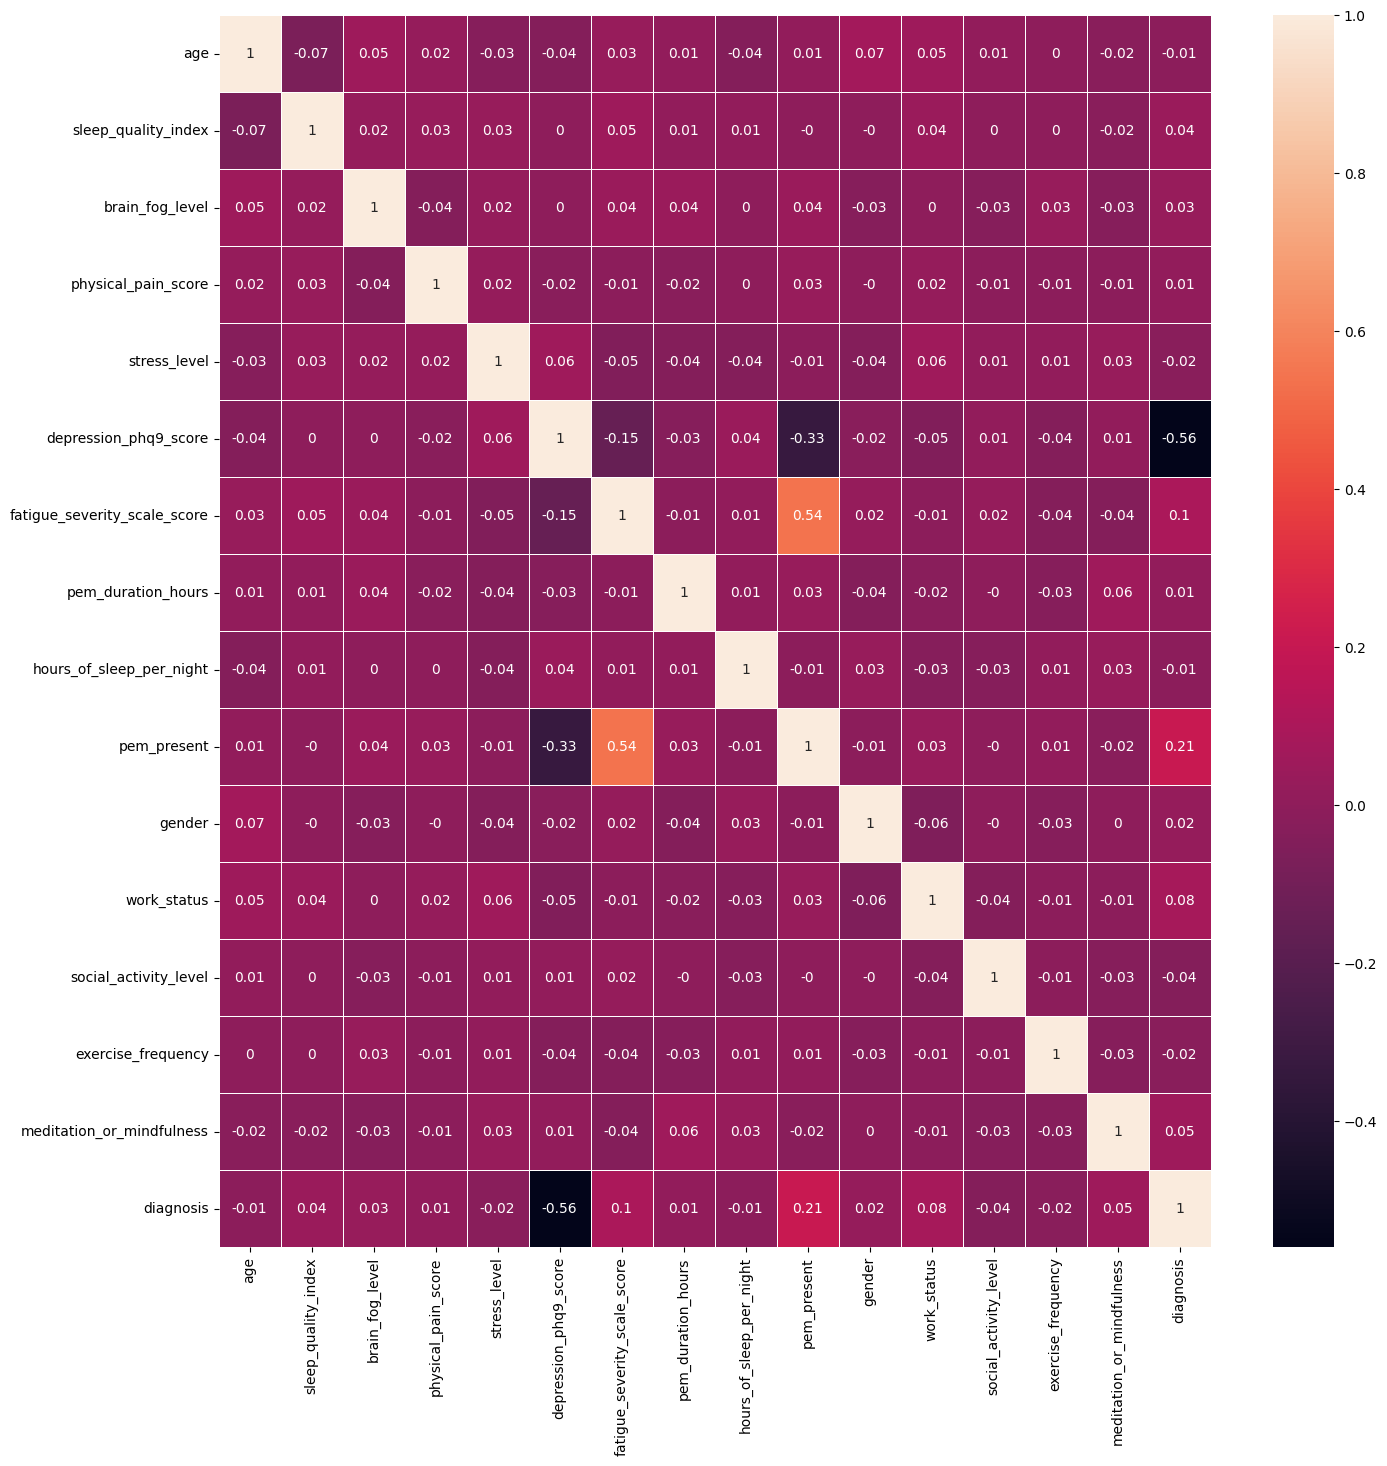

In [86]:
correlation_matrix = treated_data.corr().round(2)

fig, ax = plt.subplots(figsize=(16,16))
sns.heatmap(data=correlation_matrix, annot=True, linewidths=.5, ax=ax)

# **Análise exploratória dos dados**

# **Criação dos modelos de Machine Learning**

## **Separação da base de treino e de teste**

Agora com a análise dos dados feita, podemos com os dados (treated_data), que possui tanto os dados categóricos, como os dados númericos, fazer a separação para a utiização dos modelos de Machine Learning.
Os dados são separados em treino (x_train e y_train) e dados de teste (x_test e y_test), estes, representando 20% do total da base de dados. Assim, com estes 20% será possível que possamos verificar a eficácia de aprendizado do nosso modelo. Também utilizamos o parâmetro "stratify = y", para garantir que a mesma proporção de classes seja mantida tanto no treino quanto no teste, já que há diferença na quantidade de valores entre as três variáveis targets.

In [107]:
x = treated_data.drop("diagnosis", axis=1)
y = treated_data["diagnosis"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

In [110]:
model_lr =  LogisticRegression(class_weight="balanced", max_iter=2000)
#Treinando os dados
model_lr.fit(x_train, y_train)

#Fazendo a predição do modelo
predictions_lr = model_lr.predict(x_test)

## **Avaliando o modelo**

O modelo utilizado de Regressão Logistica teve um bom desempenho, com 95% de acurácia, tendo uma boa previsão para acertar os resultados para as classes 1 e 2 (depressão e fadiga), e uma menor eficiência para a classe 3 (ambas as doenças). Considerando o recall, a classe 2 deixa a desejar, pois, muitos diagnósticos que deveriam ser depressão são negligenciados.

In [111]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions_lr))

              precision    recall  f1-score   support

           0       1.00      0.69      0.82        39
           1       1.00      0.99      0.99        83
           2       0.86      1.00      0.92        78

    accuracy                           0.94       200
   macro avg       0.95      0.89      0.91       200
weighted avg       0.94      0.94      0.93       200



In [89]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions_lr)
print(cm)

[[27  0 12]
 [ 0 82  1]
 [ 0  0 78]]


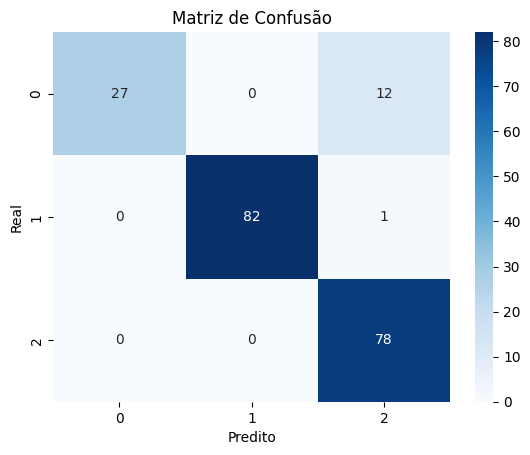

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

## **Analisando outros modelos de predição**

In [91]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

classifiers = [
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('AdaBoost', AdaBoostClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('AdaBoost', AdaBoostClassifier(random_state=42)),
    ('Naive Bayes', GaussianNB())
]

for model_name, model_class in classifiers:
  model = model_class
  model.fit(x_train, y_train)

  y_pred = model.predict(x_test)

  accuracy = accuracy_score(y_test, y_pred)

  print(f"Acurácia do modelo {model_name}: {accuracy}")

Acurácia do modelo Decision Tree: 0.99
Acurácia do modelo Random Forest: 0.995
Acurácia do modelo AdaBoost: 0.995
Acurácia do modelo Gradient Boosting: 0.995
Acurácia do modelo K-Nearest Neighbors: 0.58
Acurácia do modelo AdaBoost: 0.995
Acurácia do modelo Naive Bayes: 0.925
